<a href="https://colab.research.google.com/github/Netri-100224/ML-DS-Projects/blob/main/GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing 

In [ ]:
gold_data = pd.read_csv('/content/archive (3).zip')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
  gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Check missing values in each column


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding correlation in dataset.

In [12]:
correlation = gold_data.corr()

Heatmap

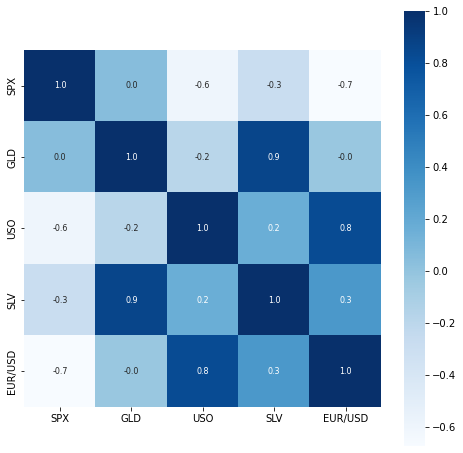

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True,fmt = '.1f',annot = True, annot_kws = {'size':8}, cmap = 'Blues')

positive correlation when a +ve value negative correlation when a negative value

In [16]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


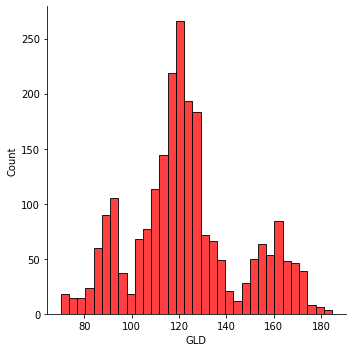

In [18]:
#check the distribution of gold price
sns.displot(gold_data['GLD'],color='RED')

Since only gold price is to be predicted,we need to split and drop some of the data set.

In [20]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [28]:
reg = RandomForestRegressor(n_estimators=100)

# the performance of the model sharply increases and then stagnates at a certain level: This means
# that choosing a large number of estimators in a random forest model is not the best idea.



In [29]:
#Training the model#

reg.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [30]:
#prediction on test data
test_data_prediction = reg.predict(x_test)
print(test_data_prediction)

[164.81179942 127.58439872 124.16459981 119.6966989  126.0278988
  86.67649802 171.75150219 135.76370001 106.83870103 133.32300179
 120.52669922 124.74510039 143.19969845 104.54559981  80.7230991
 119.95519978 140.56729954  90.34620065  91.46119942 128.2435021
 125.76529976 147.19119936 116.69660186 152.859899   129.57419824
 129.42610083 118.56840113 111.44950029 168.04650234 158.31999856
 126.0099014  154.15280195 127.09869956 122.47219787 116.47540165
 154.78160018 115.13010019 120.54330144 104.04060192 105.55760039
 134.6989989   85.81809957 155.9968018  121.2304996  122.24130089
 155.02170043 120.44619995 116.8993999  168.63350242 116.08640048
 138.16280157 161.7164987  158.64600005 153.45760102 123.91990037
 116.7384     167.37560004 117.27759977 165.89109965  84.2478004
 121.3570989  122.12129979 120.20620001 171.89540025 118.61309995
 180.08979698 162.10250338 138.63380295 115.44080004  92.56690052
 171.75020098 117.59769993 117.61389865 125.52149982 146.9103003
  91.00390062  

In [32]:
#comparing predicted data with actual data
error=metrics.r2_score(y_test,test_data_prediction)

#The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.
# However, a higher value of R square is considered desirable.


print(error)

0.9847047788086648


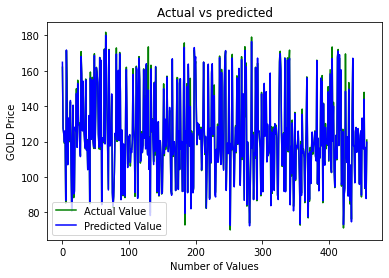

In [33]:
# converting pandas series dataframe into list
y_test=list(y_test)
plt.plot(y_test,color='green',label='Actual Value')
plt.plot(test_data_prediction,color='blue',label='Predicted Value')
plt.title('Actual vs predicted')
plt.xlabel('Number of Values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()


Since green and blue values overlapp thus very good accuracy